In [1]:
import quantum_drawer as qd
import quantum_imaging as qi

from IPython.display import Image

%matplotlib inline

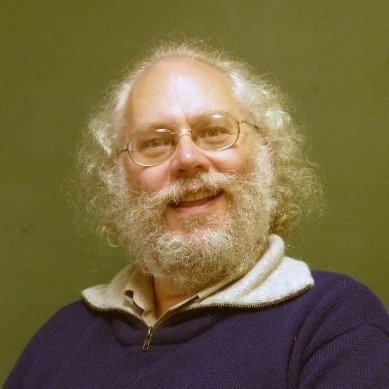

In [2]:
Image("shor.jpg")

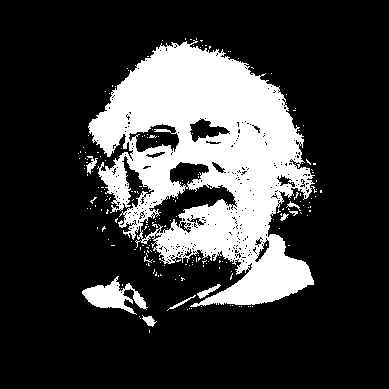

In [3]:
image_shor = qi.convert_to_bw("shor.jpg")
qi.image_from_array(image_shor)

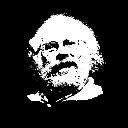

In [4]:
resized_image_shor = qi.resize_array(image_shor, size=(128, 128))
qi.image_from_array(resized_image_shor)

In [5]:
array_binary_shor = qi.binary_encode(resized_image_shor)
qi.save_bin_array_to_csv('quantum_shor.csv', array_binary_shor)

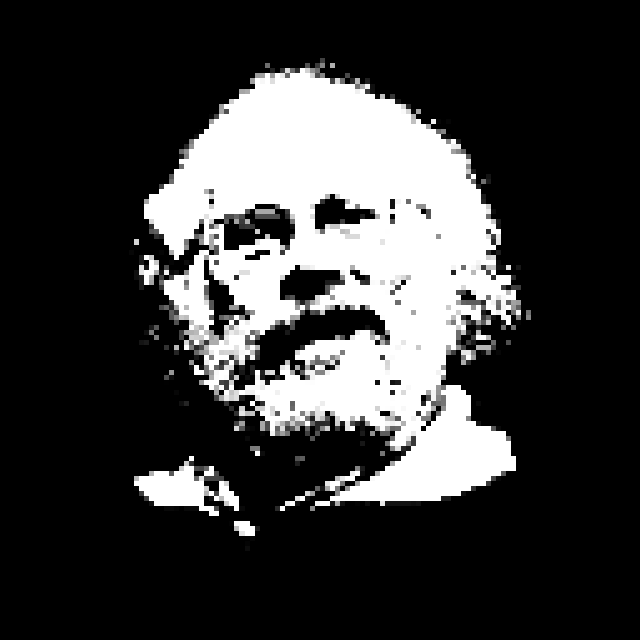

In [6]:
scaled_image_sim = qi.scale_binary_image(resized_image_shor, 5)
qi.image_from_array(scaled_image_sim)

# Use one-hot encoding drawing file to create a Quantum circuit and rebuild the image with the circuit result

# Only support square images (i.e: 32x32px, 64x64px)

In [7]:
# Simulator
qasm_sim = qd.get_quantum_simulator_backend("aer_simulator")

# Number of circuit qubits
n_qubits = 7

In [8]:
binary_data_array = qi.load_bin_array_from_csv('quantum_shor.csv')

cols_items = binary_data_array.shape[1]
splitting = qd.splitting_chunks(cols_items, n_qubits)

rework_image = qd.rebuild_image_quantum_enhance_oneshot(binary_data_array, splitting, n_qubits, qasm_sim)
rework_image.shape

(128, 128)

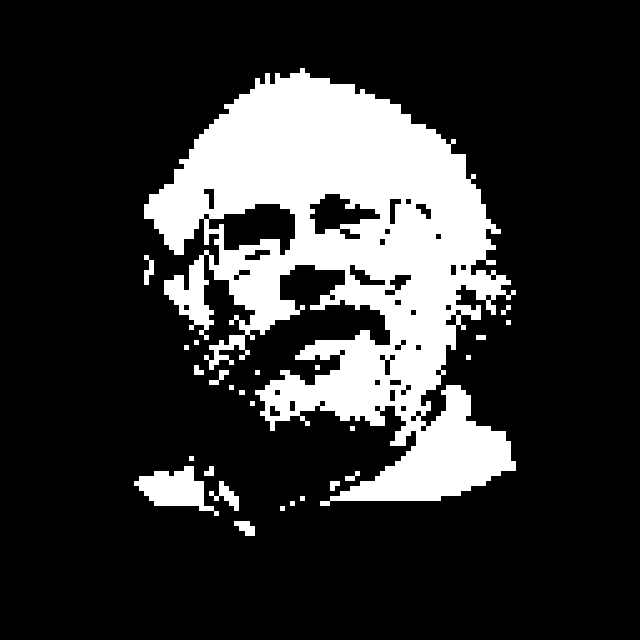

In [9]:
rebuild_data = qi.rebuild_binary_array(rework_image)
#qi.image_from_array(rebuild_data)
scaled_image = qi.scale_binary_image(rebuild_data, 5)
qi.image_from_array(scaled_image)

# Sending circuit to real quantum computer

In [10]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
import qiskit.tools.jupyter

In [11]:
if not IBMQ.active_account():
    IBMQ.load_account()

all_providers = IBMQ.providers()

provider = all_providers[0] #IBMQ.get_provider(hub='ibm-q', group='open', project='main')

In [12]:
%qiskit_backend_overview

In [13]:
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= n_qubits and b.status().operational and not b.configuration().simulator))

In [14]:
backend

<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>

In [15]:
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [ ]:
binary_data_array = qi.load_bin_array_from_csv('quantum_shor.csv')
binary_data_array = qd.invert_array(binary_data_array)

cols_items = binary_data_array.shape[1]
splitting = qd.splitting_chunks(cols_items, n_qubits)

rework_image = qd.rebuild_image_quantum_enhance_oneshot(binary_data_array, splitting, n_qubits, backend, num_shots = 1024)
rework_image.shape

In [ ]:
%qiskit_disable_job_watcher

In [ ]:
temp_rework_image = qd.invert_array(rework_image)
rebuild_data = qi.rebuild_binary_array(temp_rework_image)

#qi.image_from_array(rebuild_data)
scaled_image = qd.scale_binary_image(rebuild_data, 5)
qi.image_from_array(scaled_image)